In [1]:
import utils_adder

import numpy as np 
import pandas as pd 
import glob


import data_convertor

In [2]:
path = '../data/piezo/00_indoor_normal_cond.dat'

def load_data(path):
    data = pd.DataFrame(np.loadtxt(path,  unpack = True).T , columns=['Ts', 'N.A', 'Velocity', 'CH0', 'CH1'])
    #data = [np.loadtxt(f,  unpack = True) for f in glob.glob(path + "*.dat")]
    return data

indoor_data = load_data(path= path)
#l_df = {p.split('/')[-1].split('.')[0] : pd.read_csv(p, sep=" ", header=None) for p in glob.glob(path + "*.TXT")} 
#l_df = [pd.read_csv(p, sep=" ", header=None) for p in glob.glob(path + "*.TXT")]

In [3]:
path = '../data/berkely/00_indoor_noraml_cond/'

for i in range(0,21):
    logger = i
    l_df = data_convertor.read_txt(path=path, label=0, log_num = logger)
    data_convertor.from_df_to_csv(l_df, path, logger)

../data/berkely/00_indoor_noraml_cond/LOG0000.TXT
0
../data/berkely/00_indoor_noraml_cond/LOG0001.TXT
1
../data/berkely/00_indoor_noraml_cond/LOG0002.TXT
2
../data/berkely/00_indoor_noraml_cond/LOG0003.TXT
3
../data/berkely/00_indoor_noraml_cond/LOG0004.TXT
4
../data/berkely/00_indoor_noraml_cond/LOG0005.TXT
5
../data/berkely/00_indoor_noraml_cond/LOG0006.TXT
6
../data/berkely/00_indoor_noraml_cond/LOG0007.TXT
7
../data/berkely/00_indoor_noraml_cond/LOG0008.TXT
8
../data/berkely/00_indoor_noraml_cond/LOG0009.TXT
9
../data/berkely/00_indoor_noraml_cond/LOG0010.TXT
10
../data/berkely/00_indoor_noraml_cond/LOG0011.TXT
11
../data/berkely/00_indoor_noraml_cond/LOG0012.TXT
12
../data/berkely/00_indoor_noraml_cond/LOG0013.TXT
13
../data/berkely/00_indoor_noraml_cond/LOG0014.TXT
14
../data/berkely/00_indoor_noraml_cond/LOG0015.TXT
15
../data/berkely/00_indoor_noraml_cond/LOG0016.TXT
16
../data/berkely/00_indoor_noraml_cond/LOG0017.TXT
17
../data/berkely/00_indoor_noraml_cond/LOG0018.TXT
18
../

In [ ]:
path = '../data/berkely/callibration_data/'

logger = 0
l_df = data_convertor.read_txt(path=path, label=0, log_num = logger)
data_convertor.from_df_to_csv(l_df, path, logger)

In [4]:
#path = '../data/berkely/00_outdoor_normal_cond_220622/'
path = '../data/berkely/00_indoor_noraml_cond/'
ldf = [pd.read_csv(p) for p in glob.glob(path + "*.csv")]
df_fino = pd.concat(ldf).sort_values(by=['logger', 'ts'])

#df_uno = pd.read_csv(path+"LOG0001.csv")



In [5]:
df_fino

,x,y,cond,logger,ts
0,541.0,841.0,0.0,0.0,0.00
1,541.0,841.0,0.0,0.0,0.01
2,541.0,841.0,0.0,0.0,0.02
3,541.0,841.0,0.0,0.0,0.03
4,541.0,841.0,0.0,0.0,0.04
...,...,...,...,...,...
31495,535.0,940.0,0.0,20.0,314.95
31496,534.0,940.0,0.0,20.0,314.96
31497,539.0,943.0,0.0,20.0,314.97
31498,552.0,928.0,0.0,20.0,314.98


<IPython.core.display.Javascript object>


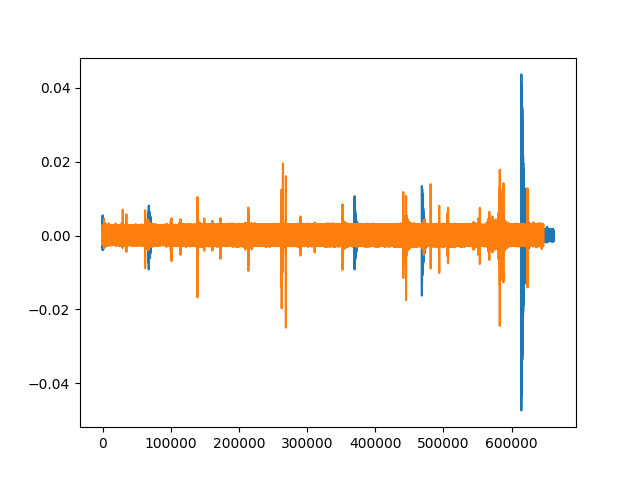

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt 
conv = 2/(2**15) 
plt.figure()
plt.plot(df_fino.x.values*conv  - np.mean(df_fino.x.values*conv))
plt.plot(indoor_data.CH1)
plt.show()

In [ ]:
import numpy as np 
def FFT(ds, lenght, fs, max_freq, array = False):
    if max_freq == 50:
        div_factor = 2
        freq = (fs/lenght)*np.arange(0,(lenght/div_factor))
    elif max_freq == 25:
        div_factor = 4
        freq = (fs/lenght)*np.arange(0,(lenght/div_factor))
    elif max_freq == 12.5: 
        div_factor = 8
        freq = (fs/lenght)*np.arange(0,(floor(lenght/div_factor)))
    else: 
        raise ValueError("Entered Frequency is not valid")

    if array == False: 
        fft = np.abs(np.real(np.fft.fft(ds)))
        fft = (div_factor/lenght)*fft[2: int(( lenght/div_factor)+2)]
    elif array == True: 
        fft = np.abs(np.real(np.fft.fft(ds, axis = 0)))
        fft = (div_factor/ lenght)*fft[2: int(( lenght/div_factor)+2), :]
 
    return freq, fft

In [ ]:
freqb, fftb = FFT(df_fino_x, df_fino.x.shape[0], 104, 50)  
freqp, fftp = FFT(indoor_data.CH1, indoor_data.CH0.shape[0], 100, 50)

In [ ]:
plt.figure()

plt.plot(freqb, fftb)
plt.figure()
plt.plot(freqp, fftp)